In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scipy
!pip install plotly
!pip install scikit-learn
!pip install scikit-learn==0.24.2
!pip install hnswlib
!pip install annoy
!pip install seaborn

In [ ]:
# Install RAPIDS libraries for GPU acceleration
#!pip install -q condacolab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
#!pip install tensorflow

     |████████████████████████████████| 479.6 MB 10.6 MB/s eta 0:00:01  |▍                               | 5.9 MB 4.2 MB/s eta 0:01:54     |████████▎                       | 124.7 MB 10.6 MB/s eta 0:00:34     |███████████                     | 165.0 MB 10.5 MB/s eta 0:00:30     |████████████▏                   | 181.9 MB 10.6 MB/s eta 0:00:29     |█████████████                   | 195.8 MB 12.3 MB/s eta 0:00:24     |██████████████▊                 | 219.9 MB 10.6 MB/s eta 0:00:25     |███████████████▉                | 238.0 MB 10.6 MB/s eta 0:00:23     |█████████████████████           | 315.3 MB 10.6 MB/s eta 0:00:16     |███████████████████████████     | 404.7 MB 11.7 MB/s eta 0:00:07
     |████████████████████████████████| 1.7 MB 11.3 MB/s eta 0:00:01
     |████████████████████████████████| 440 kB 12.0 MB/s eta 0:00:01
     |████████████████████████████████| 24.5 MB 10.1 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 12.3 MB/s eta 0:00:01
     |██████████████████████

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import butter, filtfilt
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal

In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
#import plotly.express as px
#import plotly.graph_objs as go
from matplotlib import dates as mpl_dates
from matplotlib import pyplot as plt

In [ ]:
#model and performance
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, losses
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/3D_Printing_data.csv")

In [ ]:
df

,ID,ts,Temp,RelativeHumidity
0,3DPrinter_S5_Env,2024-02-21T11:57:15.000Z,21.6875,31.490845
1,3DPrinter_S5_Env,2024-02-21T11:57:20.000Z,21.6875,31.490845
2,3DPrinter_S5_Env,2024-02-21T11:57:25.000Z,21.7500,31.475586
3,3DPrinter_S5_Env,2024-02-21T11:57:30.000Z,21.6875,31.475586
4,3DPrinter_S5_Env,2024-02-21T11:57:35.000Z,21.6875,31.475586
...,...,...,...,...
1075376,3DPrinter_S5_Env,2024-04-13T20:59:21.000Z,25.8750,28.782410
1075377,3DPrinter_S5_Env,2024-04-13T20:59:26.000Z,25.8750,28.790039
1075378,3DPrinter_S5_Env,2024-04-13T20:59:31.000Z,25.8750,28.805298
1075379,3DPrinter_S5_Env,2024-04-13T20:59:36.000Z,25.9375,28.820557


In [ ]:
df.describe()

,Temp,RelativeHumidity
count,1.007983e+06,1.075381e+06
mean,2.020231e+01,3.023567e+01
std,3.251303e+00,3.392731e+00
min,1.087500e+01,1.861243e+01
25%,1.856250e+01,2.808051e+01
50%,2.037500e+01,3.010992e+01
75%,2.218750e+01,3.225378e+01
max,3.293750e+01,4.845099e+01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075381 entries, 0 to 1075380
Data columns (total 4 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   ID                1075381 non-null  object 
 1   ts                1075381 non-null  object 
 2   Temp              1007983 non-null  float64
 3   RelativeHumidity  1075381 non-null  float64
dtypes: float64(2), object(2)
memory usage: 32.8+ MB


In [ ]:
df.isna().sum()

,0
ID,0
ts,0
Temp,67398
RelativeHumidity,0


In [ ]:
df.rename(columns={'ts': 'time'}, inplace=True)
df.rename(columns={'Temp': 'Temperature'}, inplace=True)

In [ ]:
df = df.sort_values(by='time', ascending=True)

df = df.head(600000)

df = df.reset_index(drop=True)

In [ ]:
df['time'] = pd.to_datetime(df['time'])
df['time'] = df['time'].dt.tz_localize(None)
df = df.drop(columns=['ID'],axis=1)

In [ ]:
df

,time,Temperature,RelativeHumidity
0,2024-02-16 17:44:30,21.1250,48.450989
1,2024-02-16 17:44:35,21.2500,46.909851
2,2024-02-16 17:44:40,21.2500,45.925659
3,2024-02-16 17:44:45,21.2500,45.559448
4,2024-02-16 17:44:50,21.2500,45.177979
...,...,...,...
599995,2024-03-22 11:25:44,24.6250,23.617310
599996,2024-03-22 11:25:49,24.5625,23.609680
599997,2024-03-22 11:25:54,24.5625,23.609680
599998,2024-03-22 11:25:59,24.5625,23.632568


In [ ]:
df['Temperature'] = round(df['Temperature'], 2)
df['RelativeHumidity'] = round(df['RelativeHumidity'], 2)

In [ ]:
filled_df = df
new_df1 = filled_df

In [ ]:
new_df = new_df1
new_df

,time,Temperature,RelativeHumidity
0,2024-02-16 17:44:30,21.12,48.45
1,2024-02-16 17:44:35,21.25,46.91
2,2024-02-16 17:44:40,21.25,45.93
3,2024-02-16 17:44:45,21.25,45.56
4,2024-02-16 17:44:50,21.25,45.18
...,...,...,...
599995,2024-03-22 11:25:44,24.62,23.62
599996,2024-03-22 11:25:49,24.56,23.61
599997,2024-03-22 11:25:54,24.56,23.61
599998,2024-03-22 11:25:59,24.56,23.63


### **MISSING DATA IMPUTATION WITH INTERPOLATION**

In [ ]:
new_df['Temperature'].interpolate(method='linear', inplace=True)

print(new_df)

new_df.isna().sum()

                      time  Temperature  RelativeHumidity
0      2024-02-16 17:44:30        21.12             48.45
1      2024-02-16 17:44:35        21.25             46.91
2      2024-02-16 17:44:40        21.25             45.93
3      2024-02-16 17:44:45        21.25             45.56
4      2024-02-16 17:44:50        21.25             45.18
...                    ...          ...               ...
599995 2024-03-22 11:25:44        24.62             23.62
599996 2024-03-22 11:25:49        24.56             23.61
599997 2024-03-22 11:25:54        24.56             23.61
599998 2024-03-22 11:25:59        24.56             23.63
599999 2024-03-22 11:26:04        24.56             23.63

[600000 rows x 3 columns]


,0
time,0
Temperature,0
RelativeHumidity,0


### **TIME SERIES PLOT OF THE RAW DATA**

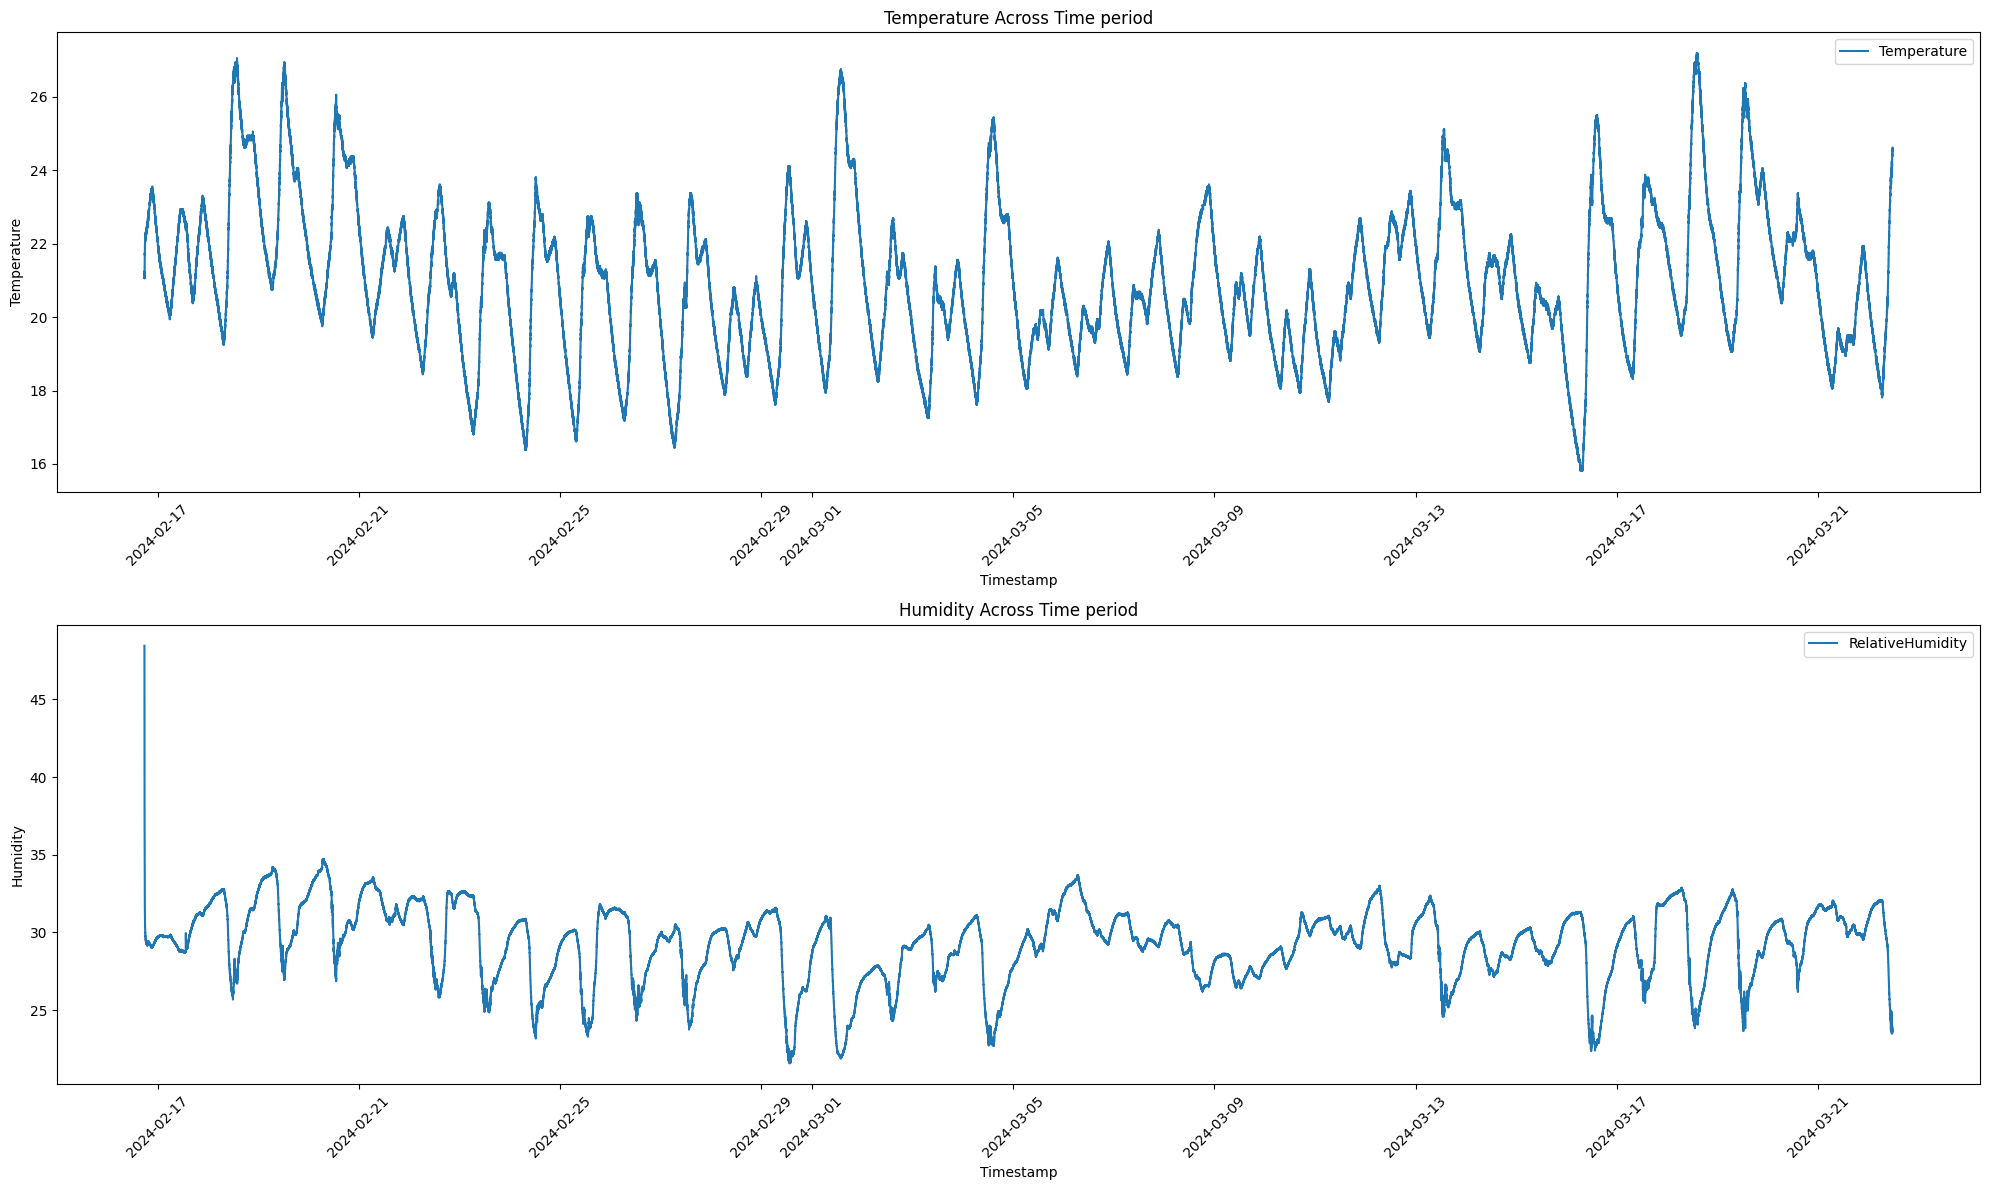

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots (one row, two columns)
fig, axs = plt.subplots(2, 1, figsize=(20, 12))

# Plot Temp and RelativeHumidity on the first subplot
axs[0].plot(new_df['time'], new_df['Temperature'], label='Temperature')
axs[0].set_xlabel('Timestamp')
axs[0].set_ylabel('Temperature')
axs[0].set_title('Temperature Across Time period')
axs[0].legend()
axs[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Plot Temp anomaly on the second subplot
axs[1].plot(new_df['time'], new_df['RelativeHumidity'], label='RelativeHumidity')
axs[1].set_xlabel('Timestamp')
axs[1].set_ylabel('Humidity')
axs[1].set_title('Humidity Across Time period')
axs[1].legend()
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()


### **CORRELATION ANALYSIS**

In [ ]:
correlation = new_df['Temperature'].corr(new_df['RelativeHumidity'])

print("Correlation between Temperature and RelativeHumidity:", correlation)

Correlation between Temperature and RelativeHumidity: -0.5193350918167664


## **INJECT ARTIFICIAL OUTLIERS TO TEMPERATURE DATA**

## **The outliers are constant values of varying itensities (e.g large variations, subtle variations and extreme variations)**

In [ ]:
new_df['Temp_anomaly'] = new_df['Temperature']

new_df['anomaly_time'] = pd.to_datetime(new_df['time'])


specific_dates1 = ['2024-03-13', '2024-03-03', '2024-02-19']
specific_dates2 = ['2024-02-21', '2024-02-25', '2024-03-07']
specific_dates3 = ['2024-02-23', '2024-02-26', '2024-03-09']
specific_dates4 = ['2024-02-29', '2024-03-05']


# Create the condition mask
mask1 = (new_df['anomaly_time'].dt.date.astype(str).isin(specific_dates1)) & (new_df['Temperature'].between(22.3, 22.45))
mask2 = (new_df['anomaly_time'].dt.date.astype(str).isin(specific_dates2)) & (new_df['Temperature'].between(20.4, 20.5))
mask3 = (new_df['anomaly_time'].dt.date.astype(str).isin(specific_dates3)) & (new_df['Temperature'].between(21.3, 21.4))
mask4 = (new_df['anomaly_time'].dt.date.astype(str).isin(specific_dates4)) & (new_df['Temperature'].between(21.5, 21.7))


# Apply the replacement
new_df.loc[mask1, 'Temp_anomaly'] = 33.885
new_df.loc[mask2, 'Temp_anomaly'] = 32.885
new_df.loc[mask3, 'Temp_anomaly'] = 24.885
new_df.loc[mask4, 'Temp_anomaly'] = 17.885


# View the updated DataFrame
new_df

,time,Temperature,RelativeHumidity,Temp_anomaly,anomaly_time
0,2024-02-16 17:44:30,21.12,48.45,21.12,2024-02-16 17:44:30
1,2024-02-16 17:44:35,21.25,46.91,21.25,2024-02-16 17:44:35
2,2024-02-16 17:44:40,21.25,45.93,21.25,2024-02-16 17:44:40
3,2024-02-16 17:44:45,21.25,45.56,21.25,2024-02-16 17:44:45
4,2024-02-16 17:44:50,21.25,45.18,21.25,2024-02-16 17:44:50
...,...,...,...,...,...
599995,2024-03-22 11:25:44,24.62,23.62,24.62,2024-03-22 11:25:44
599996,2024-03-22 11:25:49,24.56,23.61,24.56,2024-03-22 11:25:49
599997,2024-03-22 11:25:54,24.56,23.61,24.56,2024-03-22 11:25:54
599998,2024-03-22 11:25:59,24.56,23.63,24.56,2024-03-22 11:25:59


## **INJECT ARTIFICIAL OUTLIERS TO HUMIDITY DATA**

## **The outliers are constant values of varying itensities (e.g large variations, subtle variations and extreme variations)**

In [ ]:
new_df['RH_anomaly'] = new_df['RelativeHumidity']

specific_dates5 = ['2024-02-27', '2024-02-22']
specific_dates6 = ['2024-03-04']
specific_dates7 = ['2024-02-22', '2024-02-24', '2024-03-13', '2024-03-17']
specific_dates8 = ['2024-03-16']

# Create the condition mask
mask5 = (new_df['anomaly_time'].dt.date.astype(str).isin(specific_dates5)) & (new_df['RelativeHumidity'].between(29.1, 29.5))
mask6 = (new_df['anomaly_time'].dt.date.astype(str).isin(specific_dates6)) & (new_df['RelativeHumidity'].between(26.7, 27.2))
mask7 = (new_df['anomaly_time'].dt.date.astype(str).isin(specific_dates7)) & (new_df['RelativeHumidity'].between(26.8, 27.0))
mask8 = (new_df['anomaly_time'].dt.date.astype(str).isin(specific_dates8)) & (new_df['RelativeHumidity'].between(30.2, 30.5))


# Apply the replacement
new_df.loc[mask5, 'RH_anomaly'] = 40.885
new_df.loc[mask6, 'RH_anomaly'] = 36.885
new_df.loc[mask7, 'RH_anomaly'] = 29.885
new_df.loc[mask8, 'RH_anomaly'] = 25.885


# View the updated DataFrame
new_df

,time,Temperature,RelativeHumidity,Temp_anomaly,anomaly_time,RH_anomaly
0,2024-02-16 17:44:30,21.12,48.45,21.12,2024-02-16 17:44:30,48.45
1,2024-02-16 17:44:35,21.25,46.91,21.25,2024-02-16 17:44:35,46.91
2,2024-02-16 17:44:40,21.25,45.93,21.25,2024-02-16 17:44:40,45.93
3,2024-02-16 17:44:45,21.25,45.56,21.25,2024-02-16 17:44:45,45.56
4,2024-02-16 17:44:50,21.25,45.18,21.25,2024-02-16 17:44:50,45.18
...,...,...,...,...,...,...
599995,2024-03-22 11:25:44,24.62,23.62,24.62,2024-03-22 11:25:44,23.62
599996,2024-03-22 11:25:49,24.56,23.61,24.56,2024-03-22 11:25:49,23.61
599997,2024-03-22 11:25:54,24.56,23.61,24.56,2024-03-22 11:25:54,23.61
599998,2024-03-22 11:25:59,24.56,23.63,24.56,2024-03-22 11:25:59,23.63


In [ ]:
def replacevalues(val):
  if val in [33.885, 32.885, 24.885, 17.885]:
    return -1
  else:
    return 1

new_df['Temp_anomaly_labels'] = new_df['Temp_anomaly'].apply(replacevalues)


def replacevalues(val):
  if val in [40.885, 36.885, 29.885, 25.885]:
    return -1
  else:
    return 1

new_df['RH_anomaly_labels'] = new_df['RH_anomaly'].apply(replacevalues)

In [ ]:
new_df['RH_anomaly_labels'].value_counts()

,count
RH_anomaly_labels,
1,595197
-1,4803


In [ ]:
new_df['Temp_anomaly_labels'].value_counts()

,count
Temp_anomaly_labels,
1,593498
-1,6502


## **TEMPERATURE AND HUMIDITY TIME SERIES WITH INJECTED ANOMALIES**

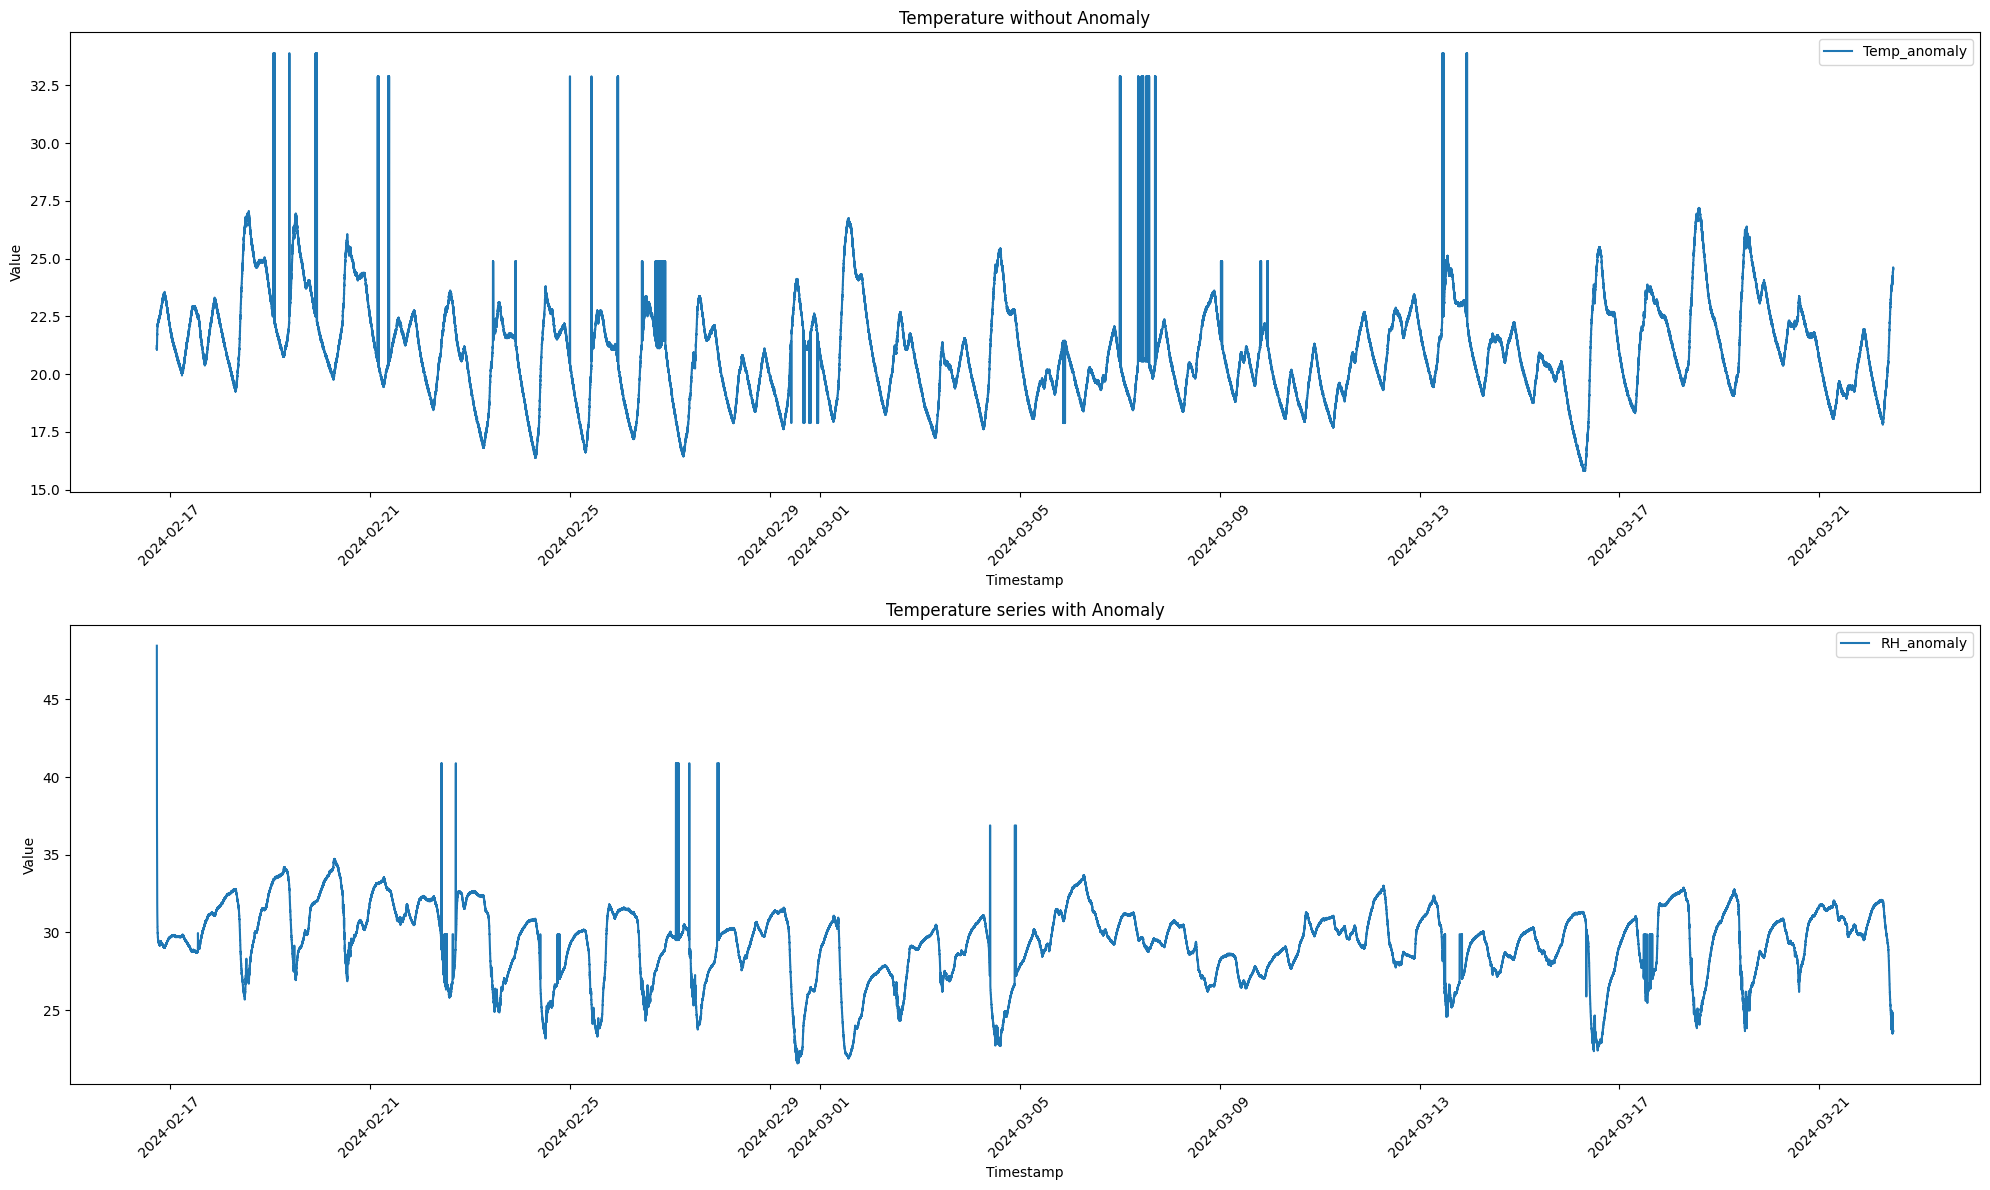

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots (one row, two columns)
fig, axs = plt.subplots(2, 1, figsize=(20, 12))

# Plot Temp and RelativeHumidity on the first subplot
axs[0].plot(new_df['time'], new_df['Temp_anomaly'], label='Temp_anomaly')
axs[0].set_xlabel('Timestamp')
axs[0].set_ylabel('Value')
axs[0].set_title('Temperature without Anomaly')
axs[0].legend()
axs[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Plot Temp anomaly on the second subplot
axs[1].plot(new_df['time'], new_df['RH_anomaly'], label='RH_anomaly')
axs[1].set_xlabel('Timestamp')
axs[1].set_ylabel('Value')
axs[1].set_title('Temperature series with Anomaly')
axs[1].legend()
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
clean_df = new_df

,time,Temperature,RelativeHumidity,Temp_anomaly,anomaly_time,RH_anomaly,Temp_anomaly_labels,RH_anomaly_labels
0,2024-02-16 17:44:30,21.12,48.45,21.12,2024-02-16 17:44:30,48.45,1,1
1,2024-02-16 17:44:35,21.25,46.91,21.25,2024-02-16 17:44:35,46.91,1,1
2,2024-02-16 17:44:40,21.25,45.93,21.25,2024-02-16 17:44:40,45.93,1,1
3,2024-02-16 17:44:45,21.25,45.56,21.25,2024-02-16 17:44:45,45.56,1,1
4,2024-02-16 17:44:50,21.25,45.18,21.25,2024-02-16 17:44:50,45.18,1,1
5,2024-02-16 17:44:55,21.19,44.70,21.19,2024-02-16 17:44:55,44.70,1,1
6,2024-02-16 17:45:00,21.19,44.27,21.19,2024-02-16 17:45:00,44.27,1,1
7,2024-02-16 17:45:05,21.19,44.00,21.19,2024-02-16 17:45:05,44.00,1,1
8,2024-02-16 17:45:10,21.19,43.73,21.19,2024-02-16 17:45:10,43.73,1,1
9,2024-02-16 17:45:15,21.19,43.54,21.19,2024-02-16 17:45:15,43.54,1,1


## **# TIME SERIES DECOMPOSITION USING STL PROCEDURE**

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import boxcox



#  Decompose to check temperature components
decomposition1 = seasonal_decompose(clean_df['Temp_anomaly'], model='additive', period=2300)
clean_df['Temp_Trend'] = decomposition1.trend
clean_df['Temp_Seasonality'] = decomposition1.seasonal
clean_df['Temp_Residual'] = decomposition1.resid

# Stationary temperature Series after removing trend and seasonality
clean_df['Temp_Stationary'] = clean_df['Temp_anomaly'] - (clean_df['Temp_Trend'] - clean_df['Temp_Seasonality'])
clean_df = clean_df.drop(columns=['Temp_Trend','Temp_Seasonality','Temp_Residual'], axis=1)

# Decompose to check humidity components
decomposition2 = seasonal_decompose(clean_df['RH_anomaly'], model='additive', period=2300)
clean_df['RH_Trend'] = decomposition2.trend
clean_df['RH_Seasonality'] = decomposition2.seasonal
clean_df['RH_Residual'] = decomposition2.resid

# Stationary humidity Series after removing trend and seasonality
clean_df['RH_Stationary'] = clean_df['RH_anomaly'] - clean_df['RH_Trend'] - clean_df['RH_Seasonality']
clean_df = clean_df.drop(columns=['RH_Trend','RH_Seasonality','RH_Residual'], axis=1)

In [ ]:
clean_df = clean_df.dropna(subset=['Temp_Stationary'])
clean_df = clean_df.dropna(subset=['RH_Stationary'])


## **# RESIDUAL PLOT OF THE TEMPERATURE AND HUMIDITY TIME SERIES**

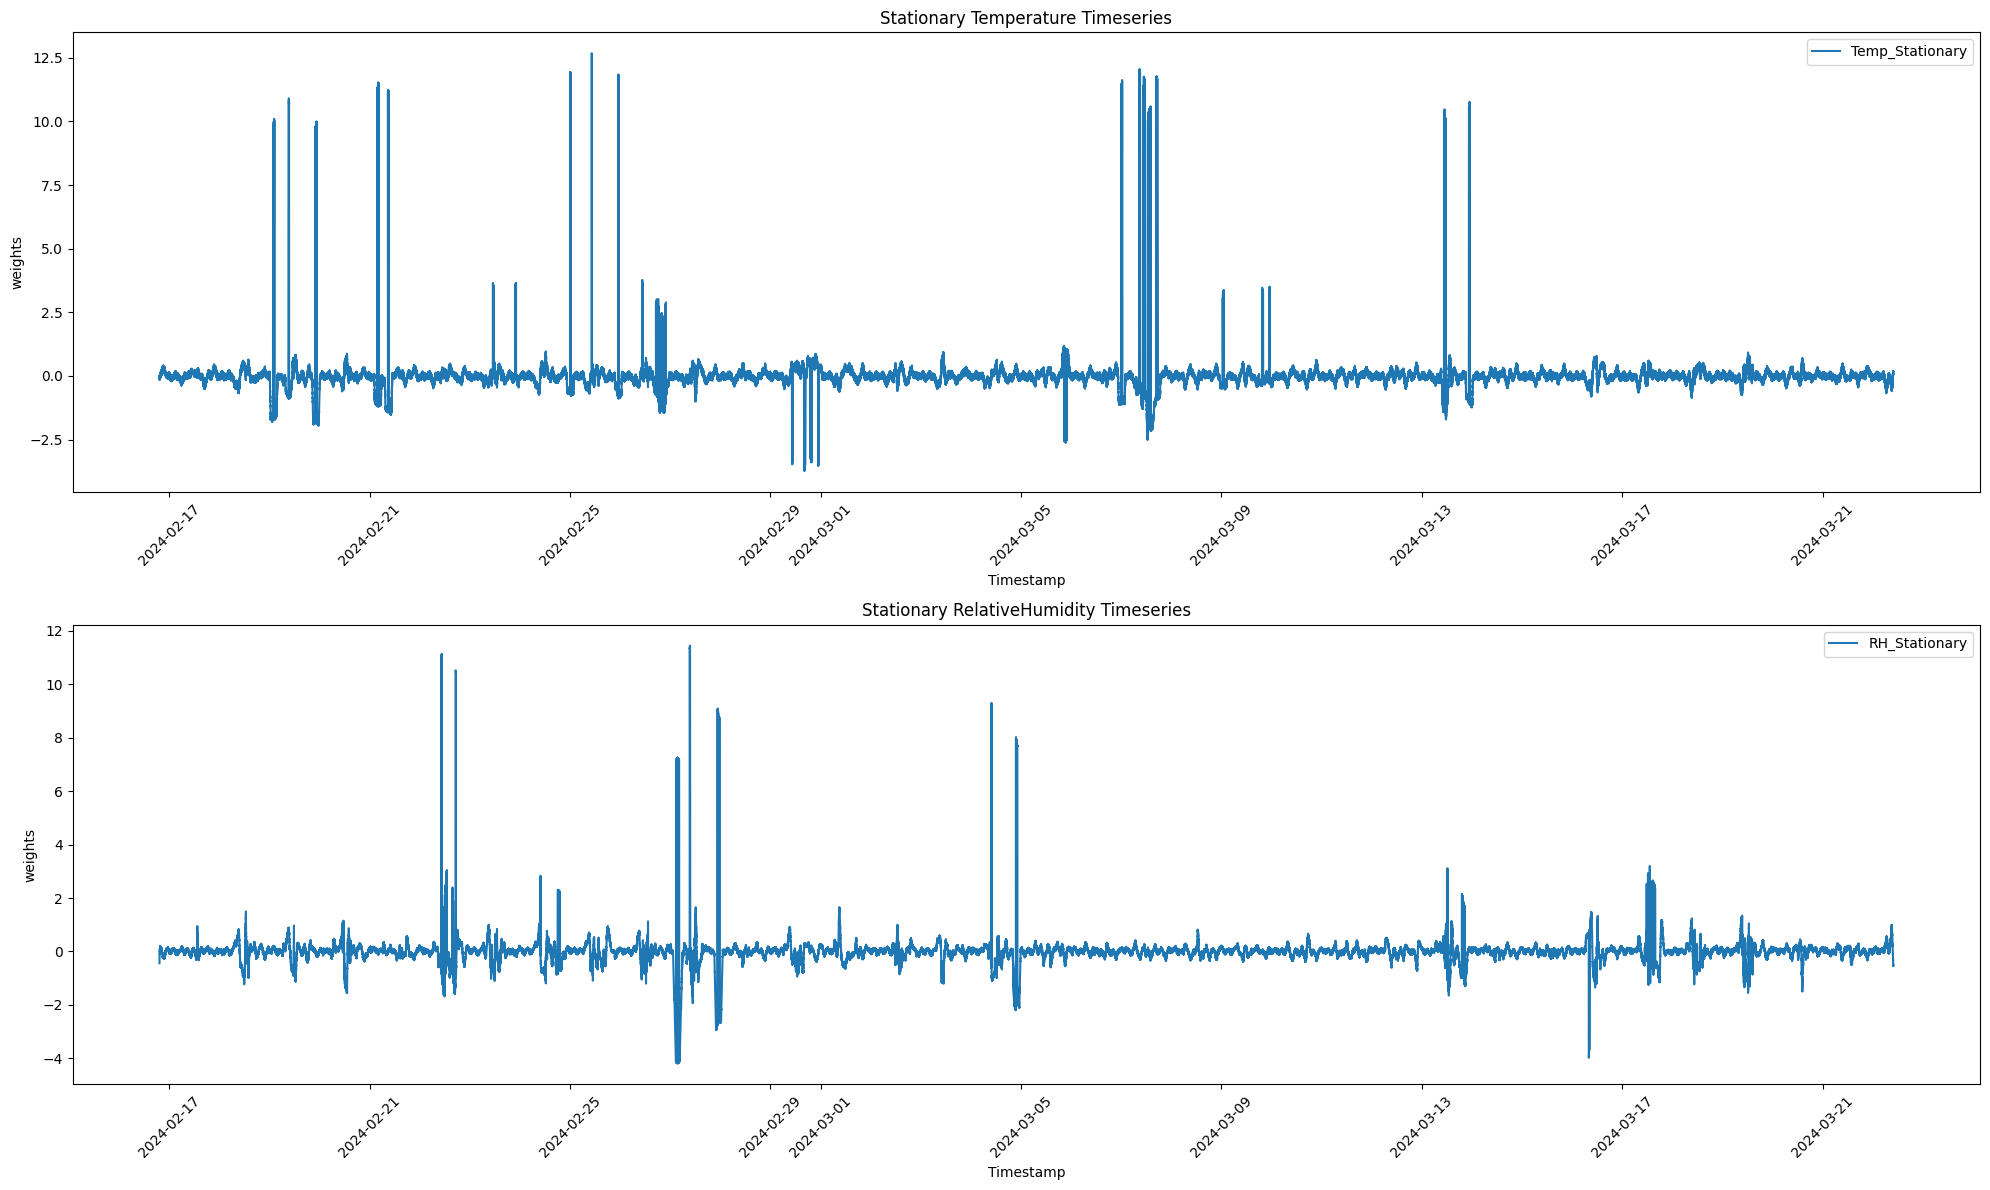

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots (one row, two columns)
fig, axs = plt.subplots(2, 1, figsize=(20, 12))

# Plot Temp and RelativeHumidity on the first subplot
axs[0].plot(clean_df['time'], clean_df['Temp_Stationary'], label='Temp_Stationary')
axs[0].set_xlabel('Timestamp')
axs[0].set_ylabel('weights')
axs[0].set_title('Stationary Temperature Timeseries')
axs[0].legend()
axs[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Plot Temp and RelativeHumidity on the first subplot
axs[1].plot(clean_df['time'], clean_df['RH_Stationary'], label='RH_Stationary')
axs[1].set_xlabel('Timestamp')
axs[1].set_ylabel('weights')
axs[1].set_title('Stationary RelativeHumidity Timeseries')
axs[1].legend()
axs[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability


# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
X = abs(clean_df['Temp_Stationary'].values)
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=0.274440, mean2=0.236448
variance1=0.680129, variance2=0.619927


In [ ]:
X = abs(clean_df['RH_Stationary'].values)
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=0.304983, mean2=0.159661
variance1=0.682180, variance2=0.061617


In [ ]:
clean_df['Temp_Stationary'] = abs(clean_df['Temp_Stationary'])
clean_df['RH_Stationary'] = abs(clean_df['RH_Stationary'])

clean_df['Temp_RH_stationary'] = abs(clean_df['Temp_Stationary'] - clean_df['RH_Stationary'])

clean_df['var_Temp_anomaly'] = clean_df['Temp_Stationary'].var(ddof=0)
clean_df['var_RH_anomaly'] = clean_df['RH_Stationary'].var(ddof=0)
clean_df

,time,Temperature,RelativeHumidity,Temp_anomaly,anomaly_time,RH_anomaly,Temp_anomaly_labels,RH_anomaly_labels,Temp_Stationary,RH_Stationary,Temp_RH_stationary,var_Temp_anomaly,var_RH_anomaly
1150,2024-02-16 19:20:21,22.62,29.33,22.62,2024-02-16 19:20:21,29.33,1,1,0.031755,0.440788,0.409033,0.650389,0.377178
1151,2024-02-16 19:20:26,22.56,29.34,22.56,2024-02-16 19:20:26,29.34,1,1,0.086534,0.423971,0.337437,0.650389,0.377178
1152,2024-02-16 19:20:31,22.62,29.34,22.62,2024-02-16 19:20:31,29.34,1,1,0.031391,0.428796,0.397405,0.650389,0.377178
1153,2024-02-16 19:20:36,22.56,29.35,22.56,2024-02-16 19:20:36,29.35,1,1,0.095555,0.411125,0.315569,0.650389,0.377178
1154,2024-02-16 19:20:41,22.62,29.35,22.62,2024-02-16 19:20:41,29.35,1,1,0.033130,0.404073,0.370944,0.650389,0.377178
...,...,...,...,...,...,...,...,...,...,...,...,...,...
598845,2024-03-22 09:49:52,22.38,26.14,22.38,2024-03-22 09:49:52,26.14,1,1,0.174017,0.510440,0.336423,0.650389,0.377178
598846,2024-03-22 09:49:57,22.38,26.14,22.38,2024-03-22 09:49:57,26.14,1,1,0.189095,0.507042,0.317946,0.650389,0.377178
598847,2024-03-22 09:50:02,22.38,26.12,22.38,2024-03-22 09:50:02,26.12,1,1,0.172918,0.524795,0.351878,0.650389,0.377178
598848,2024-03-22 09:50:07,22.38,26.12,22.38,2024-03-22 09:50:07,26.12,1,1,0.174057,0.522435,0.348379,0.650389,0.377178


In [ ]:
clean_df['Temp_RH_Anomaly_Labels'] = clean_df.apply(lambda row: 1 if (row['Temp_anomaly_labels'] == 1 and row['RH_anomaly_labels'] == 1) else -1, axis=1)

,time,Temperature,RelativeHumidity,Temp_anomaly,anomaly_time,RH_anomaly,Temp_anomaly_labels,RH_anomaly_labels,Temp_Stationary,RH_Stationary,Temp_RH_stationary,var_Temp_anomaly,var_RH_anomaly,Temp_stationary_diff,RH_stationary_diff,Temp_RH_Anomaly_Labels,Temp_RH_diff
1150,2024-02-16 19:20:21,22.62,29.33,22.62,2024-02-16 19:20:21,29.33,1,1,0.031755,0.440788,0.409033,0.650389,0.377178,0.618634,0.063610,1,0.555024
1151,2024-02-16 19:20:26,22.56,29.34,22.56,2024-02-16 19:20:26,29.34,1,1,0.086534,0.423971,0.337437,0.650389,0.377178,0.563855,0.046793,1,0.517062
1152,2024-02-16 19:20:31,22.62,29.34,22.62,2024-02-16 19:20:31,29.34,1,1,0.031391,0.428796,0.397405,0.650389,0.377178,0.618998,0.051618,1,0.567380
1153,2024-02-16 19:20:36,22.56,29.35,22.56,2024-02-16 19:20:36,29.35,1,1,0.095555,0.411125,0.315569,0.650389,0.377178,0.554834,0.033947,1,0.520887
1154,2024-02-16 19:20:41,22.62,29.35,22.62,2024-02-16 19:20:41,29.35,1,1,0.033130,0.404073,0.370944,0.650389,0.377178,0.617259,0.026895,1,0.590364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598845,2024-03-22 09:49:52,22.38,26.14,22.38,2024-03-22 09:49:52,26.14,1,1,0.174017,0.510440,0.336423,0.650389,0.377178,0.476372,0.133262,1,0.343110
598846,2024-03-22 09:49:57,22.38,26.14,22.38,2024-03-22 09:49:57,26.14,1,1,0.189095,0.507042,0.317946,0.650389,0.377178,0.461294,0.129863,1,0.331430
598847,2024-03-22 09:50:02,22.38,26.12,22.38,2024-03-22 09:50:02,26.12,1,1,0.172918,0.524795,0.351878,0.650389,0.377178,0.477471,0.147617,1,0.329854
598848,2024-03-22 09:50:07,22.38,26.12,22.38,2024-03-22 09:50:07,26.12,1,1,0.174057,0.522435,0.348379,0.650389,0.377178,0.476332,0.145257,1,0.331075


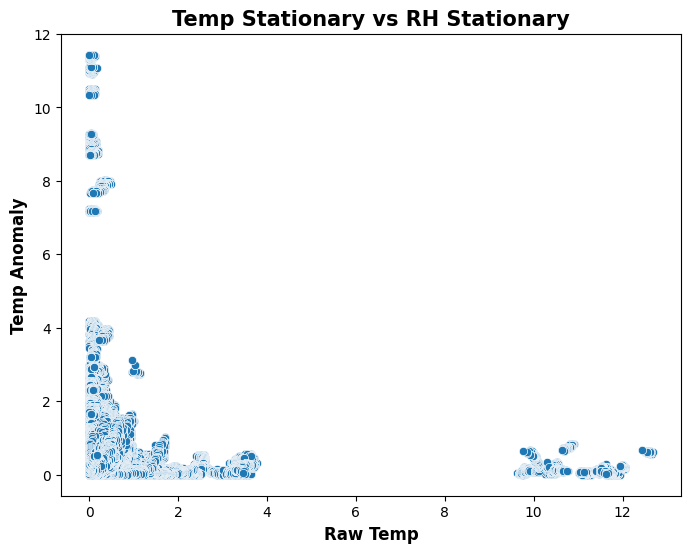

In [ ]:
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(data=clean_df, x='Temp_Stationary', y='RH_Stationary')
plt.title('Scatterplot of Temperature and Humidity Residual Components', weight='bold', fontsize=15)
plt.ylabel('Temp Anomaly', weight='bold', fontsize=12)
plt.xlabel('Raw Temp', weight='bold', fontsize=12)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import kpss

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

### **MODEL BUILDING, EVALUATION AND TESTING WITH LSTM AUTO ENCODER**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
#from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

labelled_data = clean_df[['time', 'Temp_stationary_diff', 'RH_stationary_diff', 'Temp_RH_Anomaly_Labels', 'Temp_RH_diff', 'Temp_RH_stationary']]

In [ ]:
labelled_data

,time,Temp_stationary_diff,RH_stationary_diff,Temp_RH_Anomaly_Labels,Temp_RH_diff,Temp_RH_stationary
1150,2024-02-16 19:20:21,0.618634,0.063610,1,0.555024,0.409033
1151,2024-02-16 19:20:26,0.563855,0.046793,1,0.517062,0.337437
1152,2024-02-16 19:20:31,0.618998,0.051618,1,0.567380,0.397405
1153,2024-02-16 19:20:36,0.554834,0.033947,1,0.520887,0.315569
1154,2024-02-16 19:20:41,0.617259,0.026895,1,0.590364,0.370944
...,...,...,...,...,...,...
598845,2024-03-22 09:49:52,0.476372,0.133262,1,0.343110,0.336423
598846,2024-03-22 09:49:57,0.461294,0.129863,1,0.331430,0.317946
598847,2024-03-22 09:50:02,0.477471,0.147617,1,0.329854,0.351878
598848,2024-03-22 09:50:07,0.476332,0.145257,1,0.331075,0.348379


## **NORMALIZATION OF THE Z FEATURE USING MIN MAX SCALING**

In [ ]:
val_min = labelled_data['Temp_RH_stationary'].min()
val_max = labelled_data['Temp_RH_stationary'].max()

# Feature scaling
labelled_data['Temp_RH_diff_scaled'] = labelled_data['Temp_RH_stationary'].apply(lambda x: (x - val_min) / (val_max - val_min))

<ipython-input-56-181fca226024>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelled_data['Temp_RH_diff_scaled'] = labelled_data['Temp_RH_stationary'].apply(lambda x: (x - val_min) / (val_max - val_min))


In [ ]:
labelled_data_LSTM1 = labelled_data[['time', 'Temp_RH_diff_scaled','Temp_RH_Anomaly_Labels']]

## **TRAIN TEST PLIT - LSTM AE IS TRAINED WITH 70% NORMAL DATA ONLY WHILE THE 30% OF THE REMAINING DATA COMPRISES OF ABNORMAL + NORMAL SAMPLES**

In [ ]:
# Split the dataset into normal and abnormal data
normal_data = labelled_data_LSTM1[labelled_data_LSTM1['Temp_RH_Anomaly_Labels'] != -1]  # Normal data
abnormal_data = labelled_data_LSTM1[labelled_data_LSTM1['Temp_RH_Anomaly_Labels'] == -1]  # Anomalous data

# Determine split indices for train/test split on normal data
split_index = int(len(normal_data) * 0.7)  # 70% for training, 30% for validation and testing

# Split normal data for training/validation
X_train = normal_data[:split_index]
val_normal_data = normal_data[split_index:]

# Combine normal validation data with abnormal data to form validation/test set
X_val_test = pd.concat([val_normal_data, abnormal_data]).sort_index()

# Further split the validation data into validation and unseen test data
#split_index_val = int(len(val_data) * 0.66)
#X_val_test, X_val_test_unseen = val_data[:split_index_val], val_data[split_index_val:]

print(X_train.shape, X_val_test.shape)#, X_val_test_unseen.shape)

(410476, 3) (187224, 3)


### **DATA LABELLING AND WINDOWING - TIME STEPS IS 5 MINS**

In [ ]:
# Function to create sequences for LSTM input
def create_dataset(X, time_steps=60):
    Xs = []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values  # Convert the DataFrame slice to a NumPy array
        Xs.append(v)
    return np.array(Xs)

# Define the number of time steps (sequence length)
time_steps = 60

# Prepare the data for LSTM using only the 'Temp_RH_Stationary' feature
X_train_data = create_dataset(X_train[['Temp_RH_diff_scaled']], time_steps)
X_test_data = create_dataset(X_val_test[['Temp_RH_diff_scaled']], time_steps)
#X_unseen_data = create_dataset(X_val_test_unseen[['Temp_RH_diff_scaled']], time_steps)

print(X_train_data.shape)  # (samples, time_steps, n_features)
print(X_test_data.shape)
#print(X_unseen_data.shape)

(410416, 60, 1)
(187164, 60, 1)


## **CONSTRUCTION OF THE LSTM-AUTO ENCODER DEEP LEARNING MODEL**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import random


tf.random.set_seed(41)
random.seed(42)

# Model definition
model = keras.Sequential()
model.add(keras.layers.LSTM(
    units=64,
    input_shape=(X_train_data.shape[1], X_train_data.shape[2])
))
#model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.RepeatVector(n=X_train_data.shape[1]))
model.add(keras.layers.LSTM(units=64, return_sequences=True))
#model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(units=X_train_data.shape[2])))

# Correct way to set the learning rate for the optimizer
optimizer = keras.optimizers.AdamW(learning_rate=0.0001)
model.compile(loss='mse', optimizer=optimizer)

# Print model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_3 (RepeatVector)       │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 60, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_3 (TimeDistributed) │ (None, 60, 1)               │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,985 (195.25 KB)

 Trainable params: 49,985 (195.25 KB)

 Non-trainable params: 0 (0.00 B)

## **MODEL FIT USING TEN EPOCHS**




In [ ]:
# Define the checkpoint callback to save the best model
checkpoint = keras.callbacks.ModelCheckpoint(
    'best_model_new.keras',  # file path to save the best model in .keras format
    monitor='loss',  # monitor the loss
    save_best_only=True,  # only save the model with the lowest loss
    mode='min',  # because we want to minimize the loss
    verbose=1  # log messages during training
)

history = model.fit(
    X_train_data, X_train_data,
    epochs=10,
    batch_size=64,
    shuffle=False,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="loss", patience=2, mode="min"),
        checkpoint  # add the checkpoint callback
    ],
)

Epoch 1/10
6409/6413 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.5228e-05
Epoch 1: loss improved from inf to 0.00003, saving model to best_model_new.keras
6413/6413 ━━━━━━━━━━━━━━━━━━━━ 83s 12ms/step - loss: 4.5218e-05
Epoch 2/10
6411/6413 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.6315e-05
Epoch 2: loss improved from 0.00003 to 0.00003, saving model to best_model_new.keras
6413/6413 ━━━━━━━━━━━━━━━━━━━━ 77s 12ms/step - loss: 2.6315e-05
Epoch 3/10
6412/6413 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.2681e-05
Epoch 3: loss improved from 0.00003 to 0.00002, saving model to best_model_new.keras
6413/6413 ━━━━━━━━━━━━━━━━━━━━ 80s 12ms/step - loss: 2.2681e-05
Epoch 4/10
6411/6413 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.0821e-05
Epoch 4: loss improved from 0.00002 to 0.00002, saving model to best_model_new.keras
6413/6413 ━━━━━━━━━━━━━━━━━━━━ 79s 12ms/step - loss: 2.0821e-05
Epoch 5/10
6413/6413 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.9204e-05
Epoch 5: loss improved from 0.00002 to

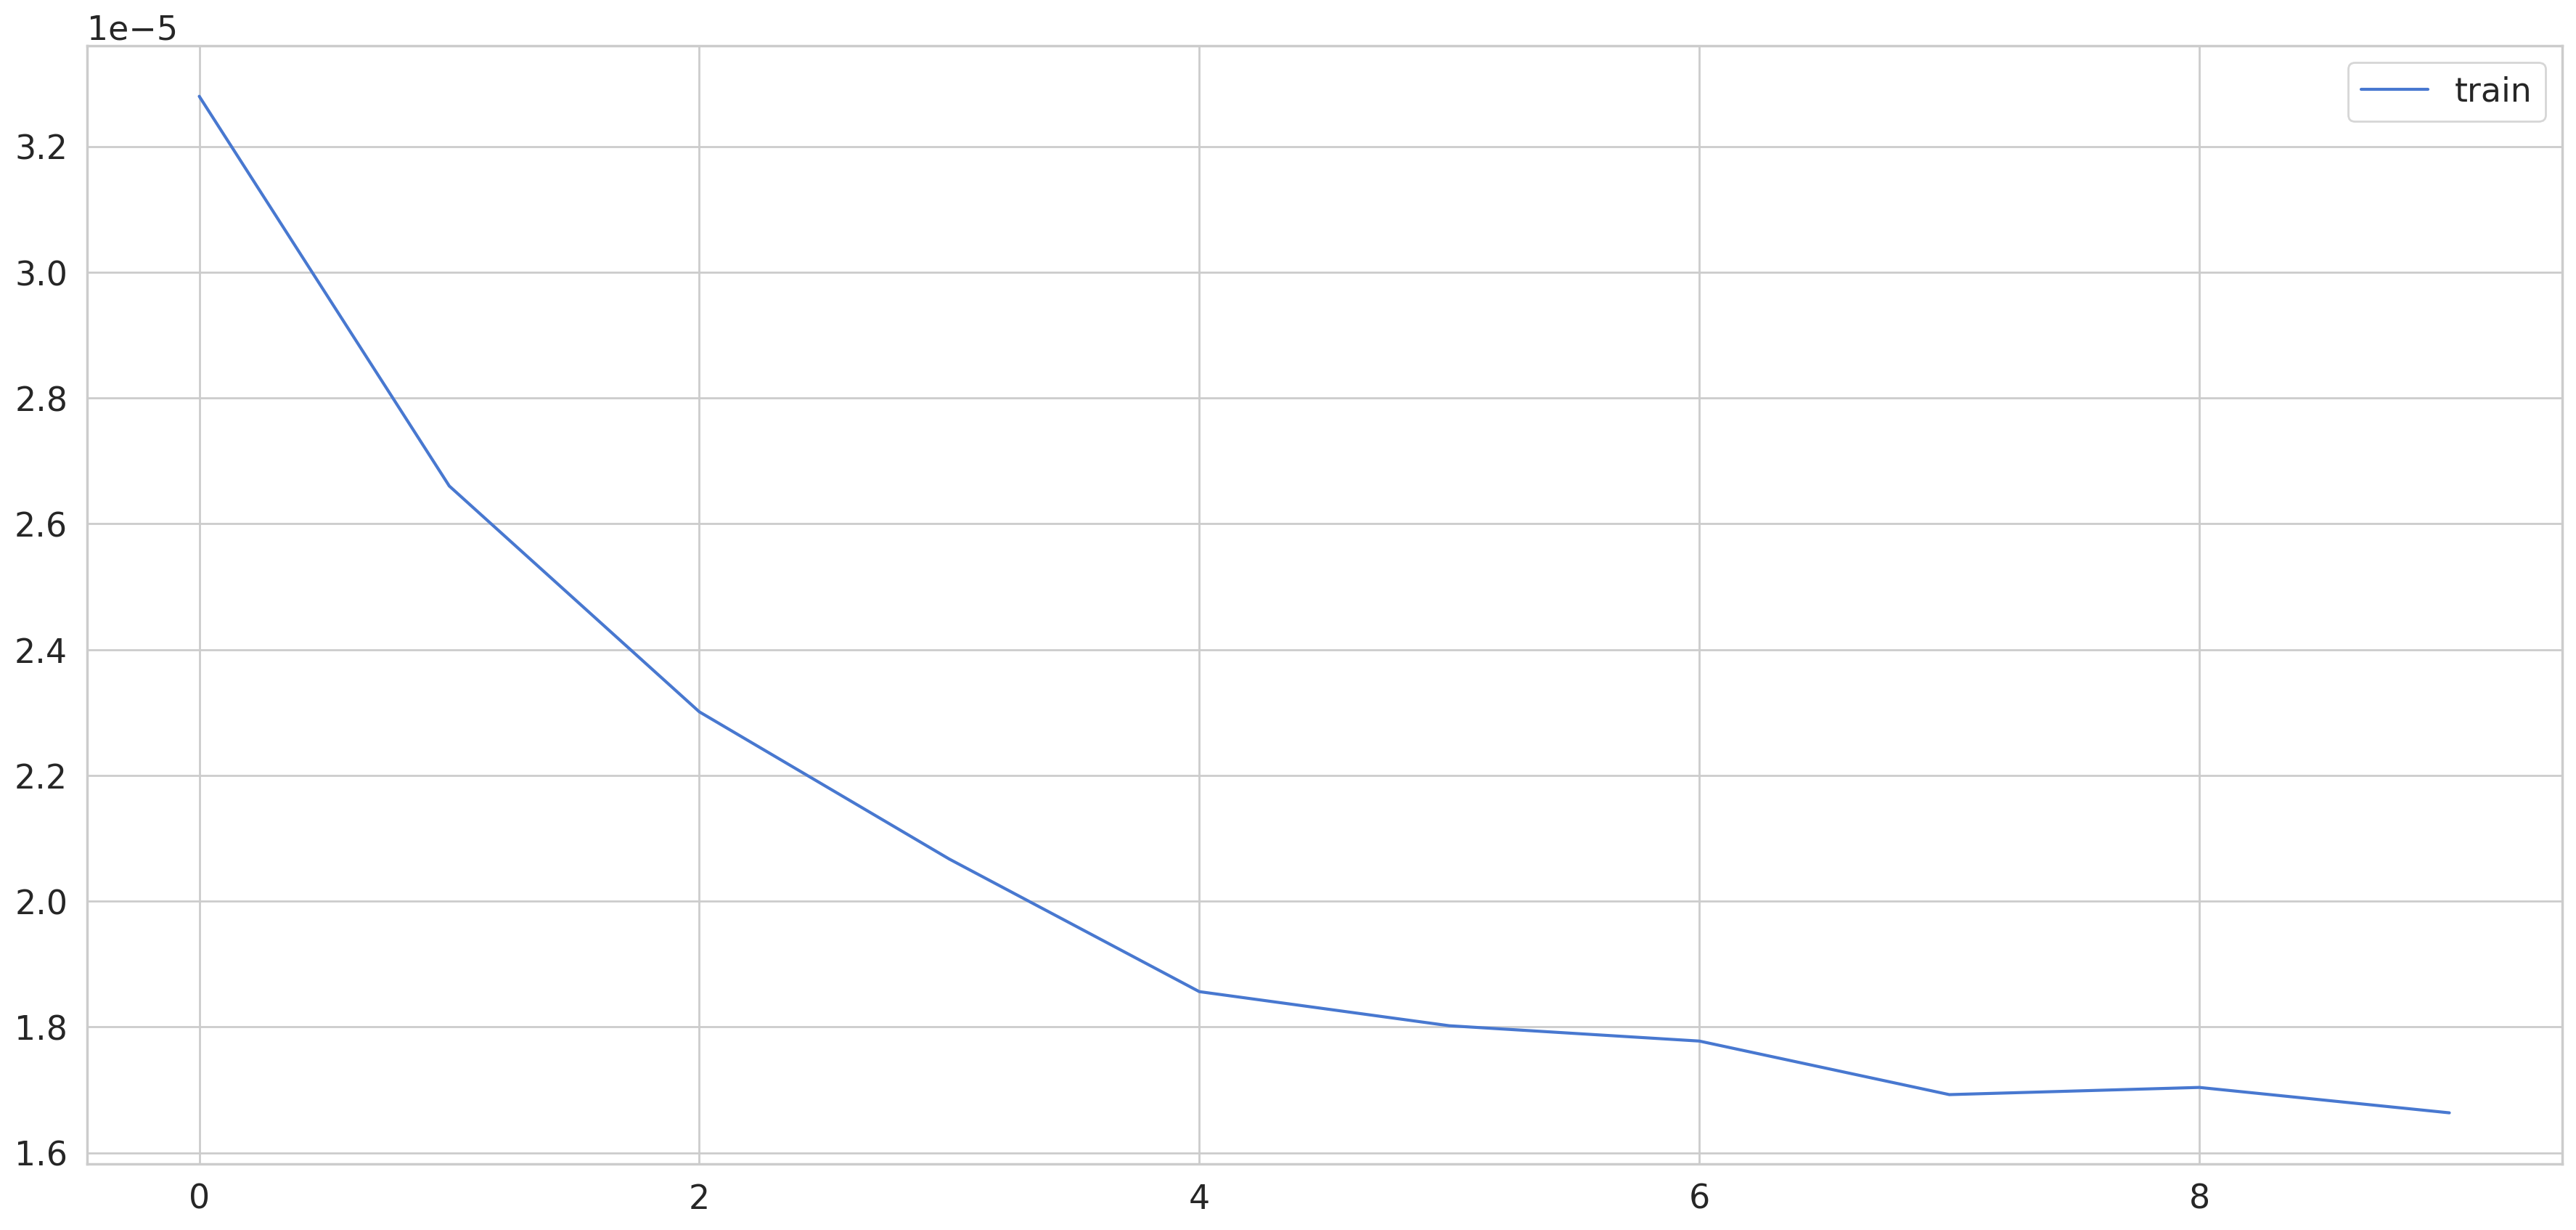

In [ ]:
plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['val_loss'], label='test')
plt.legend();

## **DERIVATION OF THE RECONSTRUCTION LOSS**

In [ ]:
# Load the model saved in .keras format
best_model = tf.keras.models.load_model('best_model_new.keras')

# Predict on the training data
X_train_pred = best_model.predict(X_train_data)

# Calculate the MAE loss for the training data
train_mae_loss = np.mean(np.abs(X_train_pred - X_train_data), axis=1)

# Convert the loss to a DataFrame
train_mae_score = pd.DataFrame(train_mae_loss, columns=['loss1'])

12826/12826 ━━━━━━━━━━━━━━━━━━━━ 57s 4ms/step


## **ERROR MARGIN THRESHOLD**

<ipython-input-285-8937da355466>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_mae_score['loss1'], bins=50, kde=True);


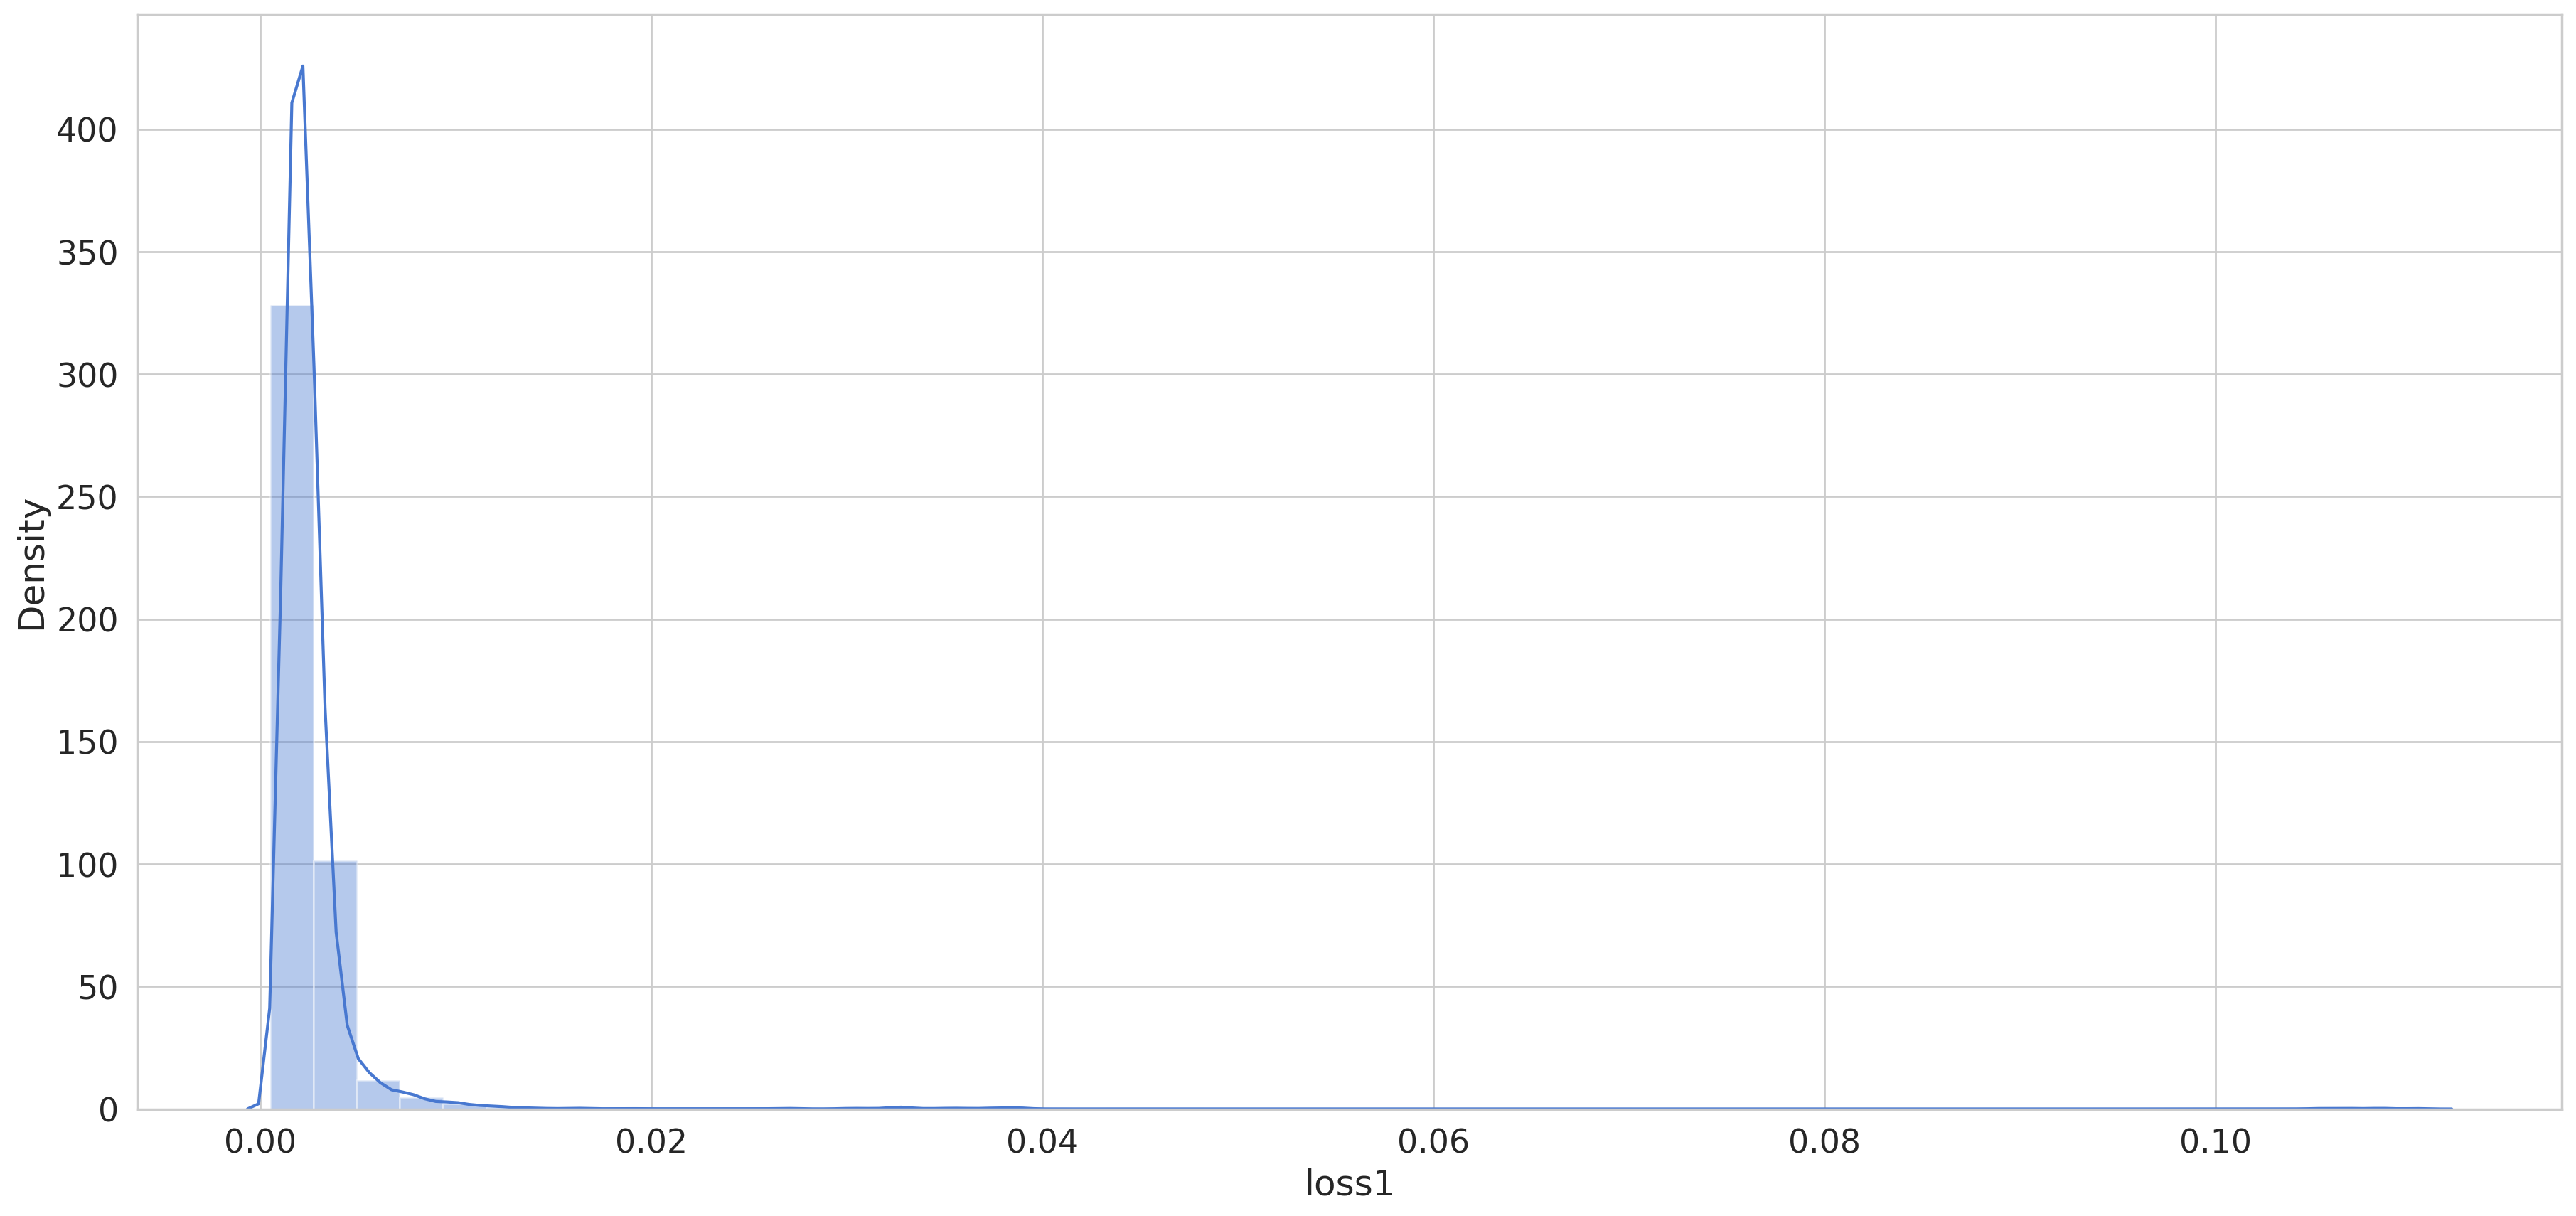

In [ ]:
sns.distplot(train_mae_score['loss1'], bins=50, kde=True);

## **TEST PREDICTIONS USING TEST DATA THAT CONTAINS ANOMALY + NORMAL SAMPLES**

In [ ]:
# Ensure the original test set contains the 'time' and feature columns
X_test_original = X_val_test[['time', 'Temp_RH_diff_scaled', 'Temp_RH_Anomaly_Labels']]  # Extract the necessary columns from the original test set

# Create sequences from the 'Temp_RH_diff_scaled' feature
X_test_data = create_dataset(X_test_original[['Temp_RH_diff_scaled']], time_steps)

In [ ]:
# Make predictions using the trained LSTM autoencoder
X_test_pred = best_model.predict(X_test_data)

# Calculate Mean Absolute Error (MAE) between the predicted and actual sequences
test_mae_loss = np.mean(np.abs(X_test_pred - X_test_data), axis=(1, 2))  # Calculate loss per sequence

# Create a DataFrame to store the MAE loss values
test_mae_score = pd.DataFrame(test_mae_loss, columns=['loss1'])

5849/5849 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step


In [ ]:
import time

# Start the timer
start_time = time.time()

# Your code
X_test_pred = best_model.predict(X_test_data)

# End the timer
end_time = time.time()

# Calculate the time taken
execution_time = end_time - start_time
print(f"Time taken to run the validation data: {execution_time} seconds")

5849/5849 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step
Time taken to run the validation data: 44.07248377799988 seconds


In [ ]:
test_mae_score

,loss1
0,0.487387
1,0.487520
2,0.487681
3,0.487836
4,0.487986
...,...
187159,0.002275
187160,0.002223
187161,0.002228
187162,0.002206


## **USING RECONSTRUCTION LOSS MARGIN/THRESHOLD TO DETECT ANOMALIES IN THE TEST DATA**

In [ ]:


THRESHOLD = 0.0117

# Align the indices to the time steps, dropping initial indices that do not form full sequences
original_indices = X_test_original.index[time_steps:]

In [ ]:
# Create a DataFrame for results and align with the original test data indices
test_score_df = pd.DataFrame(index=original_indices)
test_score_df['time'] = X_test_original['time'].iloc[time_steps:].values
test_score_df['Temp_RH_diff_scaled'] = X_test_original['Temp_RH_diff_scaled'].iloc[time_steps:].values
test_score_df['loss1'] = test_mae_loss  # Include the calculated loss

In [ ]:
# Add thresholds and detect anomalies based on the defined thresholds
test_score_df['threshold'] = THRESHOLD
test_score_df['anomaly'] = test_score_df['loss1'] > THRESHOLD

# Print the resulting DataFrame to review the detected anomalies
test_score_df['anomaly'].value_counts()

,count
anomaly,
False,174640
True,12524


In [ ]:
predicted_df = test_score_df[['time', 'anomaly']]
predicted_df['anomaly'] = predicted_df['anomaly'].apply(lambda x: 0 if x == False else (1 if x == True else x))
predicted_df

B = predicted_df['anomaly']
B = B.reset_index(drop=True)
predicted_df['anomaly'].value_counts()
B

<ipython-input-546-77a68dbd310d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predicted_df['anomaly'] = predicted_df['anomaly'].apply(lambda x: 0 if x == False else (1 if x == True else x))


,anomaly
0,1
1,1
2,1
3,1
4,1
...,...
187159,0
187160,0
187161,0
187162,0


## **PREDICTED RESULTS - '0' FOR NORMAL AND '1' FOR DEFECT**

In [ ]:
B.value_counts()

,count
anomaly,
0,174640
1,12524


In [ ]:
ground_truth = pd.DataFrame(index=X_val_test[time_steps:].index)
ground_truth = X_val_test[['time','Temp_RH_Anomaly_Labels']].iloc[60:]
ground_truth['Temp_RH_Anomaly_Labels'] = ground_truth['Temp_RH_Anomaly_Labels'].apply(lambda x: 0 if x == 1 else (1 if x == -1 else x))
ground_truth = ground_truth.reset_index(drop=True)
ground_truth['Temp_RH_Anomaly_Labels'].value_counts()
ground_truth

,time,Temp_RH_Anomaly_Labels
0,2024-02-19 01:53:20,1
1,2024-02-19 01:53:25,1
2,2024-02-19 01:53:30,1
3,2024-02-19 01:53:35,1
4,2024-02-19 01:53:40,1
...,...,...
187159,2024-03-22 09:49:52,0
187160,2024-03-22 09:49:57,0
187161,2024-03-22 09:50:02,0
187162,2024-03-22 09:50:07,0


## **REFERENCE LABELS OF THE Z-FEATURE ; '0' FOR NORMAL AND '1' FOR DEFECT**

In [ ]:
A = ground_truth[['time', 'Temp_RH_Anomaly_Labels']]
A['Temp_RH_Anomaly_Labels'].value_counts()

,count
Temp_RH_Anomaly_Labels,
0,175919
1,11245


In [ ]:
merged_df = pd.concat([A,B], axis=1)

## **EVALUATION METRICS OF HOW LSTM-AE WAS ABLE TO IDENTIFY DEFECT FROM CORRELATED Z FEATURE**

In [ ]:
#merged_df = pd.merge(predicted_df, ground_truth[['ts', 'Temp_anomaly_labels']], on='ts', how='inner')

# Calculate evaluation metrics
precision = precision_score(merged_df['Temp_RH_Anomaly_Labels'], merged_df['anomaly'], pos_label=1)
recall = recall_score(merged_df['Temp_RH_Anomaly_Labels'], merged_df['anomaly'], pos_label=1)
f1 = f1_score(merged_df['Temp_RH_Anomaly_Labels'], merged_df['anomaly'], pos_label=1)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

#conf_matrix = confusion_matrix(merged_df['Temp_anomaly_labels'], merged_df['anomaly'])

Precision: 0.844618332801022
Recall: 0.9406847487772343
F1-Score: 0.8900668938533384


### **CONFUSION MATRIX**

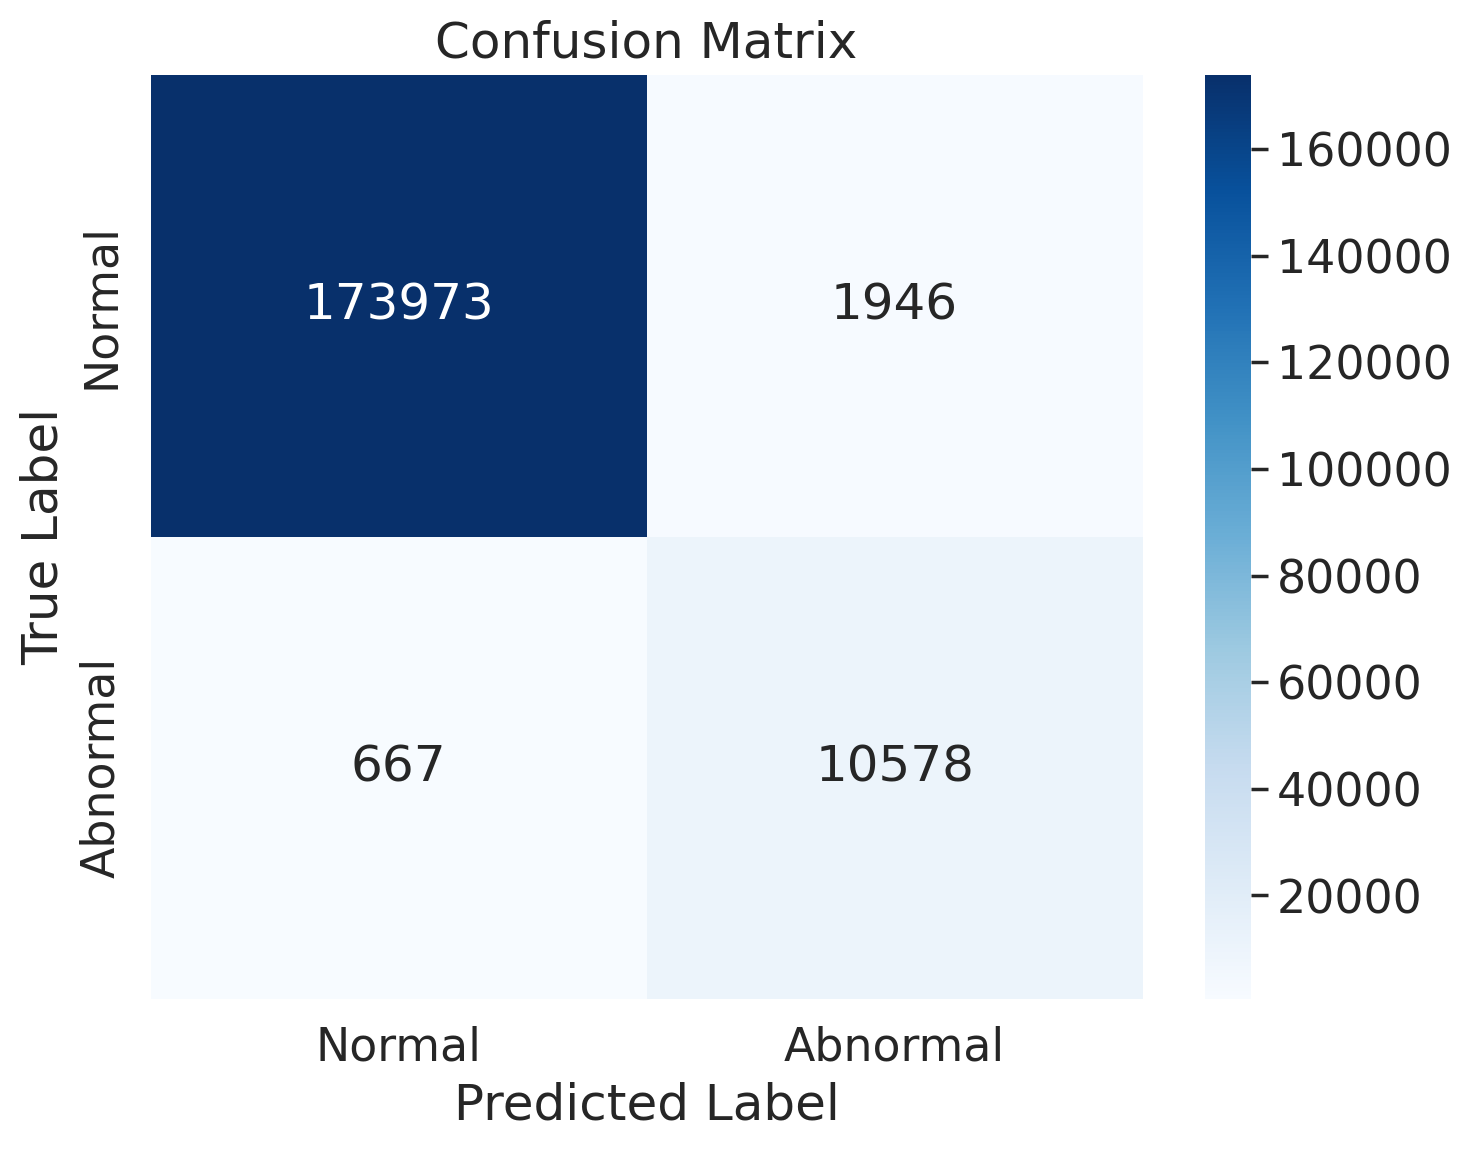

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(merged_df['Temp_RH_Anomaly_Labels'], merged_df['anomaly'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
